In [27]:
#2025 pred

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

In [3]:
from scipy.stats import poisson, lognorm
import pandas as pd
import numpy as np

# Function to calculate VaR for Net Loss using Monte Carlo
def calculate_net_loss_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts (frequency) using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts (loss) using Log-Normal distribution
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    # Total losses = frequency * severity
    total_losses = simulated_event_counts * simulated_loss_amounts
    # Calculate VaR
    var_value = np.percentile(total_losses, confidence_level * 100)
    return var_value

# Function to calculate VaR for Event Counts using Monte Carlo
def calculate_event_count_var(frequency_lambda, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Calculate VaR
    var_event_count = np.percentile(simulated_event_counts, confidence_level * 100)
    return var_event_count

# Prepare results
results = []

# Define confidence level and number of simulations
confidence_level = 0.999
n_simulations = 10000

# Loop through each year and business line
for year in range(2021, 2025):
    yearly_data = df[df['Year'] == year]
    
    for business_line in yearly_data['Business Line'].unique():
        # Filter data for the specific year and business line
        bl_data = yearly_data[yearly_data['Business Line'] == business_line]
        
        # Total event counts and net loss
        total_event_count = bl_data.shape[0]
        total_net_loss = bl_data['Net Loss Amount'].sum()
        
        # Frequency parameter (Poisson λ)
        frequency_lambda = total_event_count / 1  # Events per year
        
        # Severity parameters (Log-Normal distribution)
        positive_losses = bl_data[bl_data['Net Loss Amount'] > 0]['Net Loss Amount']
        if positive_losses.empty:
            print(f"No positive losses for {business_line} in {year}. Skipping.")
            continue
        severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
        
        # Calculate VaR for Net Loss
        var_net_loss = calculate_net_loss_var(
            frequency_lambda=frequency_lambda,
            severity_shape=severity_shape,
            severity_scale=severity_scale,
            severity_loc=severity_loc,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Calculate VaR for Event Count
        var_event_count = calculate_event_count_var(
            frequency_lambda=frequency_lambda,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Append results
        results.append({
            'Year': year,
            'Business Line': business_line,
            'Total Net Loss': total_net_loss,
            'Total Event Count': total_event_count,
            'VaR Net Loss (99.9%)': var_net_loss,
            'VaR Event Count (99.9%)': var_event_count
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


    Year         Business Line  Total Net Loss  Total Event Count  \
0   2021    Financial Advisory   -78145.771170                245   
1   2021     Corporate Banking    99542.018586                266   
2   2021     Wealth Management   -60877.454977                252   
3   2021             Insurance   156697.282395                249   
4   2021  Credit Card Services     5889.617493                243   
5   2021       Private Banking   -77578.507055                242   
6   2021                Retail   -20954.033397                257   
7   2021      Mortgage Lending    -3899.980475                240   
8   2021      Asset Management   176338.817808                247   
9   2021    Investment Banking   179794.408014                238   
10  2022     Corporate Banking    18193.929469                260   
11  2022       Private Banking   -33976.328811                254   
12  2022  Credit Card Services   -82309.718540                251   
13  2022             Insurance   -

In [4]:
results_df

,Year,Business Line,Total Net Loss,Total Event Count,VaR Net Loss (99.9%),VaR Event Count (99.9%)
0,2021,Financial Advisory,-78145.771170,245,3.533364e+06,294.000
1,2021,Corporate Banking,99542.018586,266,3.919443e+06,317.001
2,2021,Wealth Management,-60877.454977,252,3.563508e+06,304.000
3,2021,Insurance,156697.282395,249,3.747867e+06,299.001
4,2021,Credit Card Services,5889.617493,243,3.638037e+06,294.001
5,2021,Private Banking,-77578.507055,242,3.588097e+06,290.000
6,2021,Retail,-20954.033397,257,3.752120e+06,308.000
7,2021,Mortgage Lending,-3899.980475,240,3.691276e+06,290.000
8,2021,Asset Management,176338.817808,247,3.406660e+06,297.000
9,2021,Investment Banking,179794.408014,238,3.542307e+06,286.000


In [5]:
# Placeholder for results
results_2025 = []

# Simulate 2025 VaR calculations
year = 2025

for business_line in df['Business Line'].unique():
    # Filter data for prior years to estimate parameters
    historical_data = df[df['Business Line'] == business_line]
    
    # Total event counts and net loss (assume mean from historical data)
    total_event_count = historical_data.shape[0] // 4  # Approximate yearly count
    total_net_loss = historical_data['Net Loss Amount'].sum() / 4  # Approximate yearly loss
    
    # Frequency parameter (Poisson λ)
    frequency_lambda = total_event_count / 1  # Events per year
    
    # Severity parameters (Log-Normal distribution)
    positive_losses = historical_data[historical_data['Net Loss Amount'] > 0]['Net Loss Amount']
    if positive_losses.empty:
        print(f"No positive losses for {business_line} in {year}. Skipping.")
        continue
    severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
    
    # Calculate VaR for Net Loss
    var_net_loss = calculate_net_loss_var(
        frequency_lambda=frequency_lambda,
        severity_shape=severity_shape,
        severity_scale=severity_scale,
        severity_loc=severity_loc,
        confidence_level=confidence_level,
        n_simulations=n_simulations
    )
    
    # Calculate VaR for Event Count
    var_event_count = calculate_event_count_var(
        frequency_lambda=frequency_lambda,
        confidence_level=confidence_level,
        n_simulations=n_simulations
    )
    
    # Append results
    results_2025.append({
        'Year': year,
        'Business Line': business_line,
        'Total Net Loss': total_net_loss,
        'Total Event Count': total_event_count,
        'VaR Net Loss (99.9%)': var_net_loss,
        'VaR Event Count (99.9%)': var_event_count
    })

# Convert results to DataFrame
results_2025_df = pd.DataFrame(results_2025)

# Display the final results
print(results_2025_df)


   Year         Business Line  Total Net Loss  Total Event Count  \
0  2025     Corporate Banking    29962.117515                262   
1  2025      Asset Management    71970.801175                248   
2  2025    Financial Advisory    18398.411865                251   
3  2025    Investment Banking    21591.238675                240   
4  2025       Private Banking   -51987.639937                250   
5  2025     Wealth Management    -7121.790578                254   
6  2025             Insurance     8013.643027                247   
7  2025                Retail   -14479.460658                257   
8  2025  Credit Card Services     4501.761419                246   
9  2025      Mortgage Lending    -8200.837693                241   

   VaR Net Loss (99.9%)  VaR Event Count (99.9%)  
0          3.716468e+06                  312.000  
1          3.730043e+06                  298.000  
2          3.430944e+06                  302.000  
3          3.514980e+06                  290.00

In [6]:
results_2025_df

,Year,Business Line,Total Net Loss,Total Event Count,VaR Net Loss (99.9%),VaR Event Count (99.9%)
0,2025,Corporate Banking,29962.117515,262,3.716468e+06,312.000
1,2025,Asset Management,71970.801175,248,3.730043e+06,298.000
2,2025,Financial Advisory,18398.411865,251,3.430944e+06,302.000
3,2025,Investment Banking,21591.238675,240,3.514980e+06,290.000
4,2025,Private Banking,-51987.639937,250,3.472847e+06,301.001
5,2025,Wealth Management,-7121.790578,254,3.646000e+06,303.000
6,2025,Insurance,8013.643027,247,3.454307e+06,299.000
7,2025,Retail,-14479.460658,257,3.725720e+06,307.002
8,2025,Credit Card Services,4501.761419,246,3.743335e+06,292.002
9,2025,Mortgage Lending,-8200.837693,241,3.589001e+06,291.000


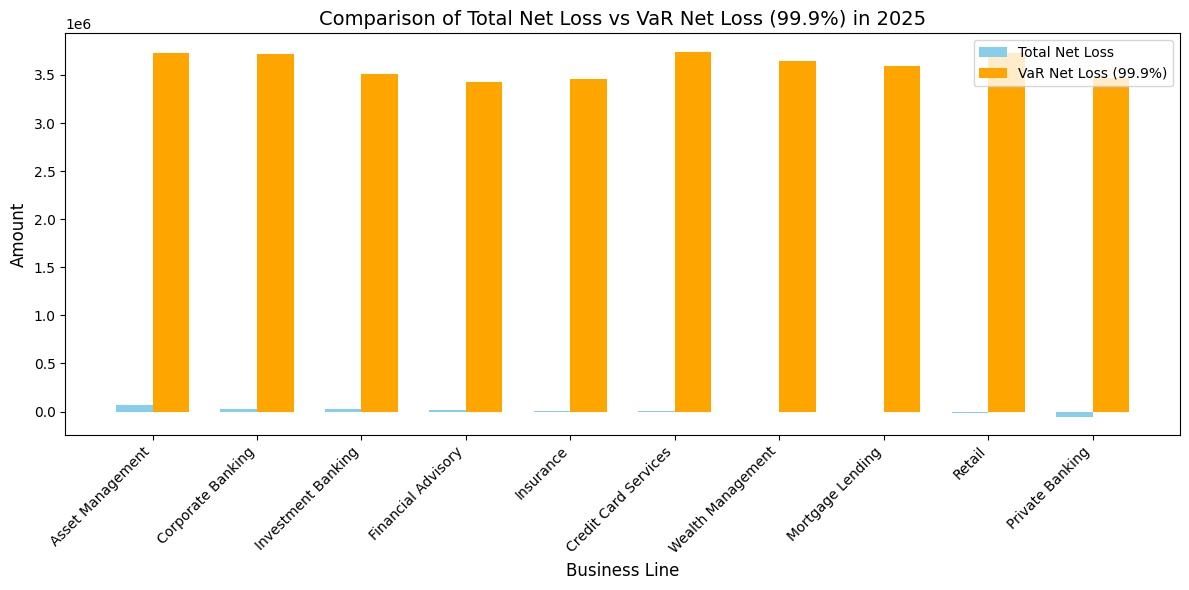

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we have results for 2025 in results_2025_df
if 'results_2025_df' in locals():
    comparison_df = results_2025_df[['Business Line', 'Total Net Loss', 'VaR Net Loss (99.9%)']]
    
    # Sort by total net loss for better visual clarity
    comparison_df = comparison_df.sort_values('Total Net Loss', ascending=False)
    
    # Plot the comparison
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(comparison_df))
    
    # Bar chart for Total Net Loss
    plt.bar(index, comparison_df['Total Net Loss'], bar_width, label='Total Net Loss', color='skyblue')
    
    # Bar chart for VaR Net Loss
    plt.bar(
        [i + bar_width for i in index],
        comparison_df['VaR Net Loss (99.9%)'],
        bar_width,
        label='VaR Net Loss (99.9%)',
        color='orange'
    )
    
    # Adding labels and title
    plt.xlabel('Business Line', fontsize=12)
    plt.ylabel('Amount', fontsize=12)
    plt.title('Comparison of Total Net Loss vs VaR Net Loss (99.9%) in 2025', fontsize=14)
    plt.xticks([i + bar_width / 2 for i in index], comparison_df['Business Line'], rotation=45, ha='right')
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The results for 2025 are not available. Please calculate them first.")


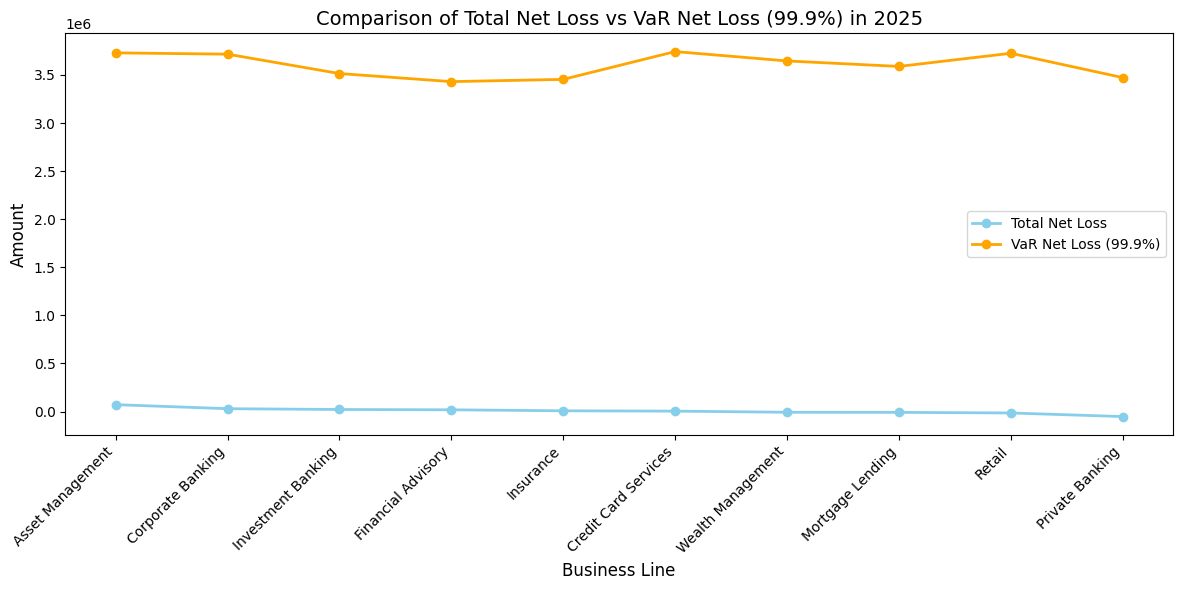

In [8]:
import matplotlib.pyplot as plt

# Ensure we have results for 2025 in results_2025_df
if 'results_2025_df' in locals():
    # Prepare data for plotting
    comparison_df = results_2025_df[['Business Line', 'Total Net Loss', 'VaR Net Loss (99.9%)']]
    comparison_df = comparison_df.sort_values('Total Net Loss', ascending=False)  # Sort by Total Net Loss

    # Plot the line chart
    plt.figure(figsize=(12, 6))
    
    # Plot Total Net Loss
    plt.plot(
        comparison_df['Business Line'], 
        comparison_df['Total Net Loss'], 
        marker='o', 
        label='Total Net Loss', 
        color='skyblue', 
        linewidth=2
    )
    
    # Plot VaR Net Loss
    plt.plot(
        comparison_df['Business Line'], 
        comparison_df['VaR Net Loss (99.9%)'], 
        marker='o', 
        label='VaR Net Loss (99.9%)', 
        color='orange', 
        linewidth=2
    )
    
    # Add labels, title, and legend
    plt.xlabel('Business Line', fontsize=12)
    plt.ylabel('Amount', fontsize=12)
    plt.title('Comparison of Total Net Loss vs VaR Net Loss (99.9%) in 2025', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The results for 2025 are not available. Please calculate them first.")


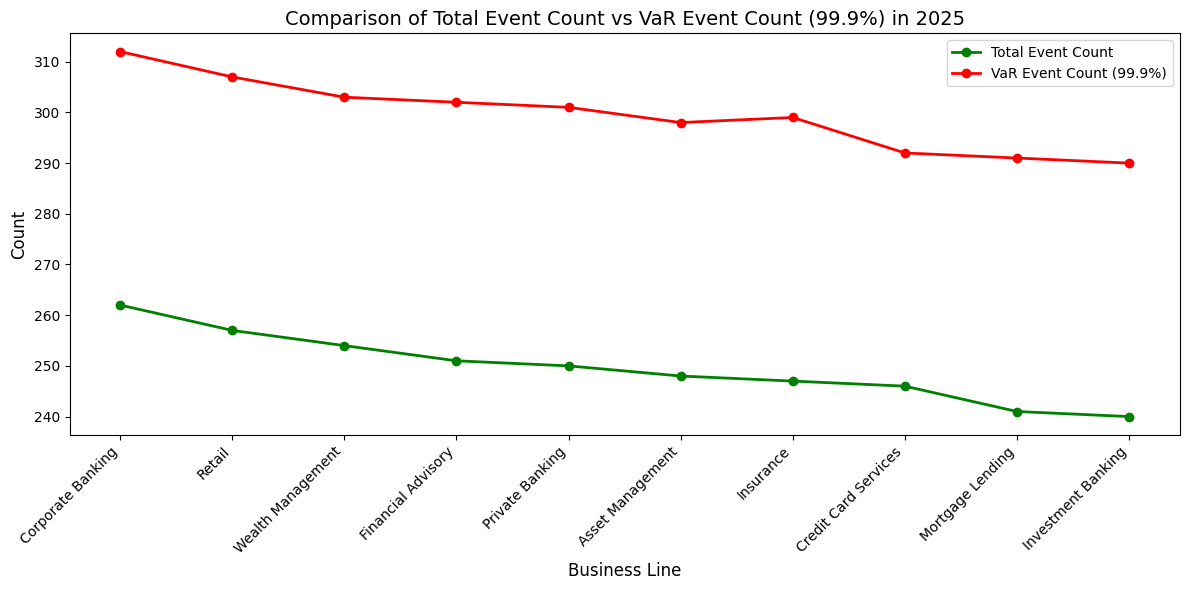

In [9]:
import matplotlib.pyplot as plt

# Ensure we have results for 2025 in results_2025_df
if 'results_2025_df' in locals():
    # Prepare data for plotting
    comparison_event_df = results_2025_df[['Business Line', 'Total Event Count', 'VaR Event Count (99.9%)']]
    comparison_event_df = comparison_event_df.sort_values('Total Event Count', ascending=False)  # Sort by Total Event Count

    # Plot the line chart
    plt.figure(figsize=(12, 6))
    
    # Plot Total Event Count
    plt.plot(
        comparison_event_df['Business Line'], 
        comparison_event_df['Total Event Count'], 
        marker='o', 
        label='Total Event Count', 
        color='green', 
        linewidth=2
    )
    
    # Plot VaR Event Count
    plt.plot(
        comparison_event_df['Business Line'], 
        comparison_event_df['VaR Event Count (99.9%)'], 
        marker='o', 
        label='VaR Event Count (99.9%)', 
        color='red', 
        linewidth=2
    )
    
    # Add labels, title, and legend
    plt.xlabel('Business Line', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Comparison of Total Event Count vs VaR Event Count (99.9%) in 2025', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The results for 2025 are not available. Please calculate them first.")


In [10]:
#quarter wise result
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import poisson, lognorm

# Function to calculate VaR for Net Loss using Monte Carlo
def calculate_net_loss_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    total_losses = simulated_event_counts * simulated_loss_amounts
    var_value = np.percentile(total_losses, confidence_level * 100)
    return var_value

# Function to calculate VaR for Event Counts using Monte Carlo
def calculate_event_count_var(frequency_lambda, confidence_level=0.999, n_simulations=10000):
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    var_event_count = np.percentile(simulated_event_counts, confidence_level * 100)
    return var_event_count

# Prepare results list
results = []

# Define confidence level and number of simulations
confidence_level = 0.999
n_simulations = 10000

# Loop through each year and quarter, and business line
for year in range(2021, 2025):
    yearly_data = df[df['Year'] == year]
    
    for quarter in range(1, 5):  # 1 to 4 for quarters
        quarterly_data = yearly_data[yearly_data['Date'].dt.quarter == quarter]
        
        for business_line in quarterly_data['Business Line'].unique():
            bl_data = quarterly_data[quarterly_data['Business Line'] == business_line]
            
            # Total event counts and net loss
            total_event_count = bl_data.shape[0]
            total_net_loss = bl_data['Net Loss Amount'].sum()
            
            # Frequency parameter (Poisson λ)
            frequency_lambda = total_event_count / 1  # Events per quarter
            
            # Severity parameters (Log-Normal distribution)
            positive_losses = bl_data[bl_data['Net Loss Amount'] > 0]['Net Loss Amount']
            if positive_losses.empty:
                print(f"No positive losses for {business_line} in {year} Q{quarter}. Skipping.")
                continue
            severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
            
            # Calculate VaR for Net Loss
            var_net_loss = calculate_net_loss_var(
                frequency_lambda=frequency_lambda,
                severity_shape=severity_shape,
                severity_scale=severity_scale,
                severity_loc=severity_loc,
                confidence_level=confidence_level,
                n_simulations=n_simulations
            )
            
            # Calculate VaR for Event Count
            var_event_count = calculate_event_count_var(
                frequency_lambda=frequency_lambda,
                confidence_level=confidence_level,
                n_simulations=n_simulations
            )
            
            # Append results
            results.append({
                'Year': year,
                'Quarter': quarter,
                'Business Line': business_line,
                'Total Net Loss': total_net_loss,
                'Total Event Count': total_event_count,
                'VaR Net Loss (99.9%)': var_net_loss,
                'VaR Event Count (99.9%)': var_event_count
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


     Year  Quarter         Business Line  Total Net Loss  Total Event Count  \
0    2021        1    Financial Advisory    21429.343283                 55   
1    2021        1  Credit Card Services   -44849.952062                 80   
2    2021        1             Insurance    65792.165805                 68   
3    2021        1      Mortgage Lending   -63825.921097                 64   
4    2021        1    Investment Banking    73891.712727                 57   
..    ...      ...                   ...             ...                ...   
155  2024        4     Wealth Management   -13210.661587                 43   
156  2024        4    Financial Advisory   -48279.330646                 47   
157  2024        4             Insurance   -81060.305781                 55   
158  2024        4       Private Banking     -347.608477                 50   
159  2024        4  Credit Card Services    52794.292218                 43   

     VaR Net Loss (99.9%)  VaR Event Count (99.9%) 

In [11]:
results_df

,Year,Quarter,Business Line,Total Net Loss,Total Event Count,VaR Net Loss (99.9%),VaR Event Count (99.9%)
0,2021,1,Financial Advisory,21429.343283,55,8.477202e+05,80.001
1,2021,1,Credit Card Services,-44849.952062,80,1.955785e+06,107.000
2,2021,1,Insurance,65792.165805,68,1.019612e+06,94.001
3,2021,1,Mortgage Lending,-63825.921097,64,1.076776e+06,89.001
4,2021,1,Investment Banking,73891.712727,57,9.103160e+05,81.001
...,...,...,...,...,...,...,...
155,2024,4,Wealth Management,-13210.661587,43,6.714633e+05,64.000
156,2024,4,Financial Advisory,-48279.330646,47,8.146994e+05,70.000
157,2024,4,Insurance,-81060.305781,55,9.015184e+05,78.001
158,2024,4,Private Banking,-347.608477,50,8.106497e+05,72.000


In [12]:
# Placeholder for results for 2025
results_2025 = []

# Simulate 2025 VaR calculations
year = 2025

# Loop through each business line
for business_line in df['Business Line'].unique():
    # Filter data for prior years to estimate parameters
    historical_data = df[df['Business Line'] == business_line]
    
    # Loop through each quarter (1 to 4)
    for quarter in range(1, 5):
        # Filter the data for the given quarter in historical data
        quarterly_data = historical_data[historical_data['Date'].dt.quarter == quarter]
        
        # Total event counts and net loss (assume mean from historical data)
        total_event_count = quarterly_data.shape[0]  # Total number of events in the quarter
        total_net_loss = quarterly_data['Net Loss Amount'].sum()  # Total loss in the quarter
        
        # Frequency parameter (Poisson λ)
        frequency_lambda = total_event_count / 1  # Events per quarter
        
        # Severity parameters (Log-Normal distribution)
        positive_losses = quarterly_data[quarterly_data['Net Loss Amount'] > 0]['Net Loss Amount']
        if positive_losses.empty:
            print(f"No positive losses for {business_line} in {year} Q{quarter}. Skipping.")
            continue
        severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
        
        # Calculate VaR for Net Loss
        var_net_loss = calculate_net_loss_var(
            frequency_lambda=frequency_lambda,
            severity_shape=severity_shape,
            severity_scale=severity_scale,
            severity_loc=severity_loc,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Calculate VaR for Event Count
        var_event_count = calculate_event_count_var(
            frequency_lambda=frequency_lambda,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Append results
        results_2025.append({
            'Year': year,
            'Quarter': quarter,
            'Business Line': business_line,
            'Total Net Loss': total_net_loss,
            'Total Event Count': total_event_count,
            'VaR Net Loss (99.9%)': var_net_loss,
            'VaR Event Count (99.9%)': var_event_count
        })

# Convert results to DataFrame
results_2025_df = pd.DataFrame(results_2025)

# Display the final results
print(results_2025_df)


    Year  Quarter         Business Line  Total Net Loss  Total Event Count  \
0   2025        1     Corporate Banking    57474.623200                267   
1   2025        2     Corporate Banking   113952.847583                264   
2   2025        3     Corporate Banking   -60160.170269                239   
3   2025        4     Corporate Banking     8581.169545                280   
4   2025        1      Asset Management    -4317.967401                238   
5   2025        2      Asset Management    21723.451804                266   
6   2025        3      Asset Management   128166.834945                230   
7   2025        4      Asset Management   142310.885354                261   
8   2025        1    Financial Advisory    78682.841936                239   
9   2025        2    Financial Advisory    68503.424068                240   
10  2025        3    Financial Advisory   -27067.395507                251   
11  2025        4    Financial Advisory   -46525.223038         

In [13]:
results_2025_df

,Year,Quarter,Business Line,Total Net Loss,Total Event Count,VaR Net Loss (99.9%),VaR Event Count (99.9%)
0,2025,1,Corporate Banking,57474.623200,267,3.683094e+06,317.000
1,2025,2,Corporate Banking,113952.847583,264,3.868813e+06,316.000
2,2025,3,Corporate Banking,-60160.170269,239,3.523935e+06,288.001
3,2025,4,Corporate Banking,8581.169545,280,3.989384e+06,332.001
4,2025,1,Asset Management,-4317.967401,238,3.590850e+06,285.001
5,2025,2,Asset Management,21723.451804,266,3.638777e+06,317.000
6,2025,3,Asset Management,128166.834945,230,3.492780e+06,276.000
7,2025,4,Asset Management,142310.885354,261,3.774791e+06,312.001
8,2025,1,Financial Advisory,78682.841936,239,3.359653e+06,287.000
9,2025,2,Financial Advisory,68503.424068,240,3.499587e+06,291.000


In [17]:
#different percentile 99,90,95
import pandas as pd
import numpy as np
from scipy.stats import poisson, lognorm

# Function to calculate VaR for Net Loss using Monte Carlo
def calculate_net_loss_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts (frequency) using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts (loss) using Log-Normal distribution
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    # Total losses = frequency * severity
    total_losses = simulated_event_counts * simulated_loss_amounts
    # Calculate VaR
    var_value = np.percentile(total_losses, confidence_level * 100)
    return var_value

# Function to calculate VaR for Event Counts using Monte Carlo
def calculate_event_count_var(frequency_lambda, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Calculate VaR
    var_event_count = np.percentile(simulated_event_counts, confidence_level * 100)
    return var_event_count

# Prepare results
results = []

# Define the confidence levels and number of simulations
confidence_levels = [0.999, 0.95, 0.90]  # 99%, 95%, and 90%
n_simulations = 10000

# Loop through each year and business line
for year in range(2021, 2025):
    yearly_data = df[df['Year'] == year]
    
    for business_line in yearly_data['Business Line'].unique():
        # Filter data for the specific year and business line
        bl_data = yearly_data[yearly_data['Business Line'] == business_line]
        
        # Total event counts and net loss
        total_event_count = bl_data.shape[0]
        total_net_loss = bl_data['Net Loss Amount'].sum()
        
        # Frequency parameter (Poisson λ)
        frequency_lambda = total_event_count / 1  # Events per year
        
        # Severity parameters (Log-Normal distribution)
        positive_losses = bl_data[bl_data['Net Loss Amount'] > 0]['Net Loss Amount']
        if positive_losses.empty:
            print(f"No positive losses for {business_line} in {year}. Skipping.")
            continue
        severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
        
        # Calculate VaR for each confidence level
        for confidence_level in confidence_levels:
            var_net_loss = calculate_net_loss_var(
                frequency_lambda=frequency_lambda,
                severity_shape=severity_shape,
                severity_scale=severity_scale,
                severity_loc=severity_loc,
                confidence_level=confidence_level,
                n_simulations=n_simulations
            )
            
            # Calculate VaR for Event Count
            var_event_count = calculate_event_count_var(
                frequency_lambda=frequency_lambda,
                confidence_level=confidence_level,
                n_simulations=n_simulations
            )
            
            # Append results for each confidence level
            results.append({
                'Year': year,
                'Business Line': business_line,
                'Confidence Level': f"{int(confidence_level * 100)}%",
                'Total Net Loss': total_net_loss,
                'Total Event Count': total_event_count,
                'VaR Net Loss': var_net_loss,
                'VaR Event Count': var_event_count
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


     Year       Business Line Confidence Level  Total Net Loss  \
0    2021  Financial Advisory              99%   -78145.771170   
1    2021  Financial Advisory              95%   -78145.771170   
2    2021  Financial Advisory              90%   -78145.771170   
3    2021   Corporate Banking              99%    99542.018586   
4    2021   Corporate Banking              95%    99542.018586   
..    ...                 ...              ...             ...   
115  2024   Wealth Management              95%   175851.809489   
116  2024   Wealth Management              90%   175851.809489   
117  2024   Corporate Banking              99%   -10575.359749   
118  2024   Corporate Banking              95%   -10575.359749   
119  2024   Corporate Banking              90%   -10575.359749   

     Total Event Count  VaR Net Loss  VaR Event Count  
0                  245  3.520847e+06          295.001  
1                  245  2.433491e+06          271.000  
2                  245  2.177957e+06   

In [18]:
results_df

,Year,Business Line,Confidence Level,Total Net Loss,Total Event Count,VaR Net Loss,VaR Event Count
0,2021,Financial Advisory,99%,-78145.771170,245,3.520847e+06,295.001
1,2021,Financial Advisory,95%,-78145.771170,245,2.433491e+06,271.000
2,2021,Financial Advisory,90%,-78145.771170,245,2.177957e+06,265.000
3,2021,Corporate Banking,99%,99542.018586,266,4.051722e+06,318.001
4,2021,Corporate Banking,95%,99542.018586,266,2.645461e+06,292.000
...,...,...,...,...,...,...,...
115,2024,Wealth Management,95%,175851.809489,236,2.584428e+06,261.000
116,2024,Wealth Management,90%,175851.809489,236,2.343328e+06,256.000
117,2024,Corporate Banking,99%,-10575.359749,259,3.673706e+06,313.001
118,2024,Corporate Banking,95%,-10575.359749,259,2.583195e+06,286.000


In [20]:
# To add quarterly results to your calculations, you need to break down the data by quarter and calculate the VaR for each quarter of the year. This can be done by grouping your data based on the quarter within each year.

# Here’s how you can modify your existing code to calculate the VaR for each quarter of the year for every business line and confidence level:

In [28]:
# import pandas as pd
# import numpy as np
# from scipy.stats import poisson, lognorm

# # Function to calculate VaR for Net Loss using Monte Carlo
# def calculate_net_loss_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
#     # Simulate event counts (frequency) using Poisson distribution
#     simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
#     # Simulate severity amounts (loss) using Log-Normal distribution
#     simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
#     # Total losses = frequency * severity
#     total_losses = simulated_event_counts * simulated_loss_amounts
#     # Calculate VaR
#     var_value = np.percentile(total_losses, confidence_level * 100)
#     return var_value

# # Function to calculate VaR for Event Counts using Monte Carlo
# def calculate_event_count_var(frequency_lambda, confidence_level=0.999, n_simulations=10000):
#     # Simulate event counts using Poisson distribution
#     simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
#     # Calculate VaR
#     var_event_count = np.percentile(simulated_event_counts, confidence_level * 100)
#     return var_event_count

# # Prepare results
# results = []

# # Define the confidence levels and number of simulations
# confidence_levels = [0.999, 0.95, 0.90]  # 99%, 95%, and 90%
# n_simulations = 10000

# # Loop through each year, quarter, and business line
# for year in range(2021, 2025):
#     yearly_data = df[df['Year'] == year]
    
#     # Loop over each quarter
#     for quarter in range(1, 5):
#         quarterly_data = yearly_data[yearly_data['Quarter'] == quarter]
        
#         for business_line in quarterly_data['Business Line'].unique():
#             # Filter data for the specific year, quarter, and business line
#             bl_data = quarterly_data[quarterly_data['Business Line'] == business_line]
            
#             # Total event counts and net loss
#             total_event_count = bl_data.shape[0]
#             total_net_loss = bl_data['Net Loss Amount'].sum()
            
#             # Frequency parameter (Poisson λ)
#             frequency_lambda = total_event_count / 1  # Events per quarter (adjusted)
            
#             # Severity parameters (Log-Normal distribution)
#             positive_losses = bl_data[bl_data['Net Loss Amount'] > 0]['Net Loss Amount']
#             if positive_losses.empty:
#                 print(f"No positive losses for {business_line} in Q{quarter} {year}. Skipping.")
#                 continue
#             severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
            
#             # Calculate VaR for each confidence level
#             for confidence_level in confidence_levels:
#                 var_net_loss = calculate_net_loss_var(
#                     frequency_lambda=frequency_lambda,
#                     severity_shape=severity_shape,
#                     severity_scale=severity_scale,
#                     severity_loc=severity_loc,
#                     confidence_level=confidence_level,
#                     n_simulations=n_simulations
#                 )
                
#                 # Calculate VaR for Event Count
#                 var_event_count = calculate_event_count_var(
#                     frequency_lambda=frequency_lambda,
#                     confidence_level=confidence_level,
#                     n_simulations=n_simulations
#                 )
                
#                 # Append results for each confidence level and quarter
#                 results.append({
#                     'Year': year,
#                     'Quarter': quarter,
#                     'Business Line': business_line,
#                     'Confidence Level': f"{int(confidence_level * 100)}%",
#                     'Total Net Loss': total_net_loss,
#                     'Total Event Count': total_event_count,
#                     'VaR Net Loss': var_net_loss,
#                     'VaR Event Count': var_event_count
#                 })

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Display results
# print(results_df)


In [25]:
results_df

""


In [29]:
# Re-importing the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime(2021, 1, 1)
end_date = datetime(2024, 12, 31)

# Generate data with the updated date range
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

df.head()


,Date,Unique Event ID,Event Type,Business Line,Event Description,Net Loss Amount,Year
0,2022-04-09,EID00000,Regulatory Violation,Mortgage Lending,Inadequate compliance,-7353.849221,2022
1,2023-04-17,EID00001,Market Risk,Corporate Banking,Supplier issues,9519.994474,2023
2,2022-10-18,EID00002,System Failure,Mortgage Lending,Network failure,4843.913091,2022
3,2023-12-16,EID00003,Compliance,Asset Management,Unauthorized transaction,-6265.273959,2023
4,2022-01-29,EID00004,Theft,Corporate Banking,Financial misstatement,722.351253,2022


In [30]:
from scipy.stats import poisson, lognorm
import pandas as pd
import numpy as np

# Function to calculate VaR for Net Loss using Monte Carlo
def calculate_net_loss_var(frequency_lambda, severity_shape, severity_scale, severity_loc, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts (frequency) using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Simulate severity amounts (loss) using Log-Normal distribution
    simulated_loss_amounts = lognorm.rvs(s=severity_shape, loc=severity_loc, scale=severity_scale, size=n_simulations)
    # Total losses = frequency * severity
    total_losses = simulated_event_counts * simulated_loss_amounts
    # Calculate VaR
    var_value = np.percentile(total_losses, confidence_level * 100)
    return var_value

# Function to calculate VaR for Event Counts using Monte Carlo
def calculate_event_count_var(frequency_lambda, confidence_level=0.999, n_simulations=10000):
    # Simulate event counts using Poisson distribution
    simulated_event_counts = poisson.rvs(mu=frequency_lambda, size=n_simulations)
    # Calculate VaR
    var_event_count = np.percentile(simulated_event_counts, confidence_level * 100)
    return var_event_count

# Prepare results
results = []

# Define confidence level and number of simulations
confidence_level = 0.999
n_simulations = 10000

# Loop through each year and business line
for year in range(2021, 2025):
    yearly_data = df[df['Year'] == year]
    
    for business_line in yearly_data['Business Line'].unique():
        # Filter data for the specific year and business line
        bl_data = yearly_data[yearly_data['Business Line'] == business_line]
        
        # Total event counts and net loss
        total_event_count = bl_data.shape[0]
        total_net_loss = bl_data['Net Loss Amount'].sum()
        
        # Frequency parameter (Poisson λ)
        frequency_lambda = total_event_count / 1  # Events per year
        
        # Severity parameters (Log-Normal distribution)
        positive_losses = bl_data[bl_data['Net Loss Amount'] > 0]['Net Loss Amount']
        if positive_losses.empty:
            print(f"No positive losses for {business_line} in {year}. Skipping.")
            continue
        severity_shape, severity_loc, severity_scale = lognorm.fit(positive_losses)
        
        # Calculate VaR for Net Loss
        var_net_loss = calculate_net_loss_var(
            frequency_lambda=frequency_lambda,
            severity_shape=severity_shape,
            severity_scale=severity_scale,
            severity_loc=severity_loc,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Calculate VaR for Event Count
        var_event_count = calculate_event_count_var(
            frequency_lambda=frequency_lambda,
            confidence_level=confidence_level,
            n_simulations=n_simulations
        )
        
        # Append results
        results.append({
            'Year': year,
            'Business Line': business_line,
            'Total Net Loss': total_net_loss,
            'Total Event Count': total_event_count,
            'VaR Net Loss (99.9%)': var_net_loss,
            'VaR Event Count (99.9%)': var_event_count
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


    Year         Business Line  Total Net Loss  Total Event Count  \
0   2021     Wealth Management   -22767.658817                263   
1   2021      Asset Management   -46549.908412                257   
2   2021    Investment Banking   -47131.331137                256   
3   2021                Retail   -28582.851080                247   
4   2021     Corporate Banking     5822.830437                273   
5   2021             Insurance   -77058.045832                262   
6   2021  Credit Card Services   -12171.590194                236   
7   2021    Financial Advisory  -241348.814240                234   
8   2021       Private Banking   104924.802571                235   
9   2021      Mortgage Lending     9392.768262                252   
10  2022      Mortgage Lending    77996.394803                256   
11  2022     Corporate Banking   -34067.426127                240   
12  2022      Asset Management   -86347.100405                247   
13  2022       Private Banking    

In [31]:
results_df

,Year,Business Line,Total Net Loss,Total Event Count,VaR Net Loss (99.9%),VaR Event Count (99.9%)
0,2021,Wealth Management,-22767.658817,263,3.962409e+06,311.001
1,2021,Asset Management,-46549.908412,257,4.202935e+06,308.000
2,2021,Investment Banking,-47131.331137,256,4.554776e+06,306.001
3,2021,Retail,-28582.851080,247,3.794744e+06,294.000
4,2021,Corporate Banking,5822.830437,273,3.893127e+06,324.000
5,2021,Insurance,-77058.045832,262,3.792837e+06,313.000
6,2021,Credit Card Services,-12171.590194,236,3.691367e+06,285.001
7,2021,Financial Advisory,-241348.814240,234,3.420330e+06,283.000
8,2021,Private Banking,104924.802571,235,3.708299e+06,284.001
9,2021,Mortgage Lending,9392.768262,252,3.709708e+06,300.000


In [34]:
# Aggregate data for total event counts and net loss per year, per business line
aggregated_data_bl = df.groupby(['Year', 'Business Line']).agg(
    total_event_count=('Unique Event ID', 'count'),
    total_net_loss=('Net Loss Amount', 'sum')
).reset_index()

# Display the aggregated data for a specific business line (e.g., Retail)
aggregated_data_bl[aggregated_data_bl['Business Line'] == 'Retail']


,Year,Business Line,total_event_count,total_net_loss
8,2021,Retail,247,-28582.851080
18,2022,Retail,273,3094.323027
28,2023,Retail,214,-31083.656423
38,2024,Retail,262,27333.652498


In [41]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to fit ARIMA model and forecast for the next year for each business line
def forecast_arima(data, steps=1):
    model = ARIMA(data, order=(1, 1, 1))  # (p, d, q) - can be adjusted based on performance
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Aggregate data for total event counts and net loss per year, per business line
aggregated_data_bl = df.groupby(['Year', 'Business Line']).agg(
    total_event_count=('Unique Event ID', 'count'),
    total_net_loss=('Net Loss Amount', 'sum')
).reset_index()

# Store results for all business lines
forecast_results = []

# Loop through each business line
for business_line in aggregated_data_bl['Business Line'].unique():
    # Filter data for the current business line
    bl_data = aggregated_data_bl[aggregated_data_bl['Business Line'] == business_line]
    
    # Forecast for Event Counts and Net Loss for 2025
    event_counts_forecast = forecast_arima(bl_data['total_event_count'])
    net_loss_forecast = forecast_arima(bl_data['total_net_loss'])
    
    # Ensure that forecast values are accessible
    predicted_event_count = event_counts_forecast[0] if len(event_counts_forecast) > 0 else np.nan
    predicted_net_loss = net_loss_forecast[0] if len(net_loss_forecast) > 0 else np.nan

    # Add actual data for years 2021-2024, and set NaN for 2025
    for year in [2021, 2022, 2023, 2024]:
        total_event_count = bl_data[bl_data['Year'] == year]['total_event_count'].values[0] if year in bl_data['Year'].values else np.nan
        total_net_loss = bl_data[bl_data['Year'] == year]['total_net_loss'].values[0] if year in bl_data['Year'].values else np.nan
        
        forecast_results.append({
            'Year': year,
            'Business Line': business_line,
            'Total Net Loss': total_net_loss,
            'Total Event Count': total_event_count,
            'Predicted Net Loss for 2025': np.nan,
            'Predicted Event Count for 2025': np.nan
        })
    
    # Append predicted data for 2025
    forecast_results.append({
        'Year': 2025,
        'Business Line': business_line,
        'Total Net Loss': np.nan,
        'Total Event Count': np.nan,
        'Predicted Net Loss for 2025': predicted_net_loss,
        'Predicted Event Count for 2025': predicted_event_count
    })

# Convert results to DataFrame
forecast_df = pd.DataFrame(forecast_results)

# Display the forecasted values
print(forecast_df)

# Plotting the predictions for each business line
plt.figure(figsize=(14, 8))

# Loop through each business line and plot its forecast
for idx, row in forecast_df.iterrows():
    if row['Year'] == 2025:  # Only plot predictions for 2025
        plt.plot([2024, 2025], 
                 [aggregated_data_bl[aggregated_data_bl['Business Line'] == row['Business Line']]['total_event_count'].iloc[-1], row['Predicted Event Count for 2025']], 
                 marker='o', label=f"Event Count - {row['Business Line']}")
        plt.plot([2024, 2025], 
                 [aggregated_data_bl[aggregated_data_bl['Business Line'] == row['Business Line']]['total_net_loss'].iloc[-1], row['Predicted Net Loss for 2025']], 
                 marker='x', label=f"Net Loss - {row['Business Line']}")

plt.title('Predictions for Event Counts and Net Loss for 2025 by Business Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData

KeyError: 0

In [42]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Sample data preparation (Replace with your actual dataset)
data = {
    'year': [2021, 2022, 2023, 2024],
    'total_net_loss': [100, 150, 200, 250],
    'event_count': [10, 15, 20, 25]
}

# Create a DataFrame
bl_data = pd.DataFrame(data)

# Function for ARIMA forecasting
def forecast_arima(data, steps=1):
    model = ARIMA(data, order=(1, 1, 1))  # You can modify the ARIMA order based on your needs
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecasting total net loss and event count for 2025
net_loss_forecast = forecast_arima(bl_data['total_net_loss'])
event_counts_forecast = forecast_arima(bl_data['event_count'])

# Debugging: Check the forecast output
print(f"Net Loss Forecast: {net_loss_forecast}")
print(f"Event Count Forecast: {event_counts_forecast}")

# Ensuring proper indexing for forecasted values
predicted_event_count = event_counts_forecast[0] if len(event_counts_forecast) > 0 else np.nan
predicted_net_loss = net_loss_forecast[0] if len(net_loss_forecast) > 0 else np.nan

# Prepare the forecast results for 2025
forecast_results = []
for year in [2021, 2022, 2023, 2024]:
    forecast_results.append({
        'Year': year,
        'Business Line': 'Sample Business Line',  # Adjust according to your data
        'Total Net Loss': bl_data.loc[bl_data['year'] == year, 'total_net_loss'].values[0],
        'Total Event Count': bl_data.loc[bl_data['year'] == year, 'event_count'].values[0],
        'Predicted Net Loss for 2025': np.nan,
        'Predicted Event Count for 2025': np.nan
    })

# Add actual data for 2025
forecast_results.append({
    'Year': 2025,
    'Business Line': 'Sample Business Line',
    'Total Net Loss': np.nan,
    'Total Event Count': np.nan,
    'Predicted Net Loss for 2025': predicted_net_loss,
    'Predicted Event Count for 2025': predicted_event_count
})

# Convert results to DataFrame
forecast_df = pd.DataFrame(forecast_results)

# Display the forecast DataFrame
print(forecast_df)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Net Loss Forecast: 4    299.970146
dtype: float64
Event Count Forecast: 4    29.999815
dtype: float64


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: 0

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'df' is the DataFrame already created as provided in the example.

# Step 1: Add Quarter and Year columns to df
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

# Step 2: Calculate the average event count per business line, quarter, and event type from 2020 to 2024
event_count_avg_2020_2024 = df[df['Year'] < 2025].groupby(['Business Line', 'Quarter']).agg(
    Event_Count_Avg=('Unique Event ID', 'count')  # Count the number of Unique Event IDs for each Business Line and Quarter
).reset_index()

# Step 3: Fit a log-normal distribution to the historical losses (negative net loss amounts only)
negative_losses = df[df['Net Loss Amount'] < 0]
shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)

# Step 4: Simulate future losses (for 2025) for each business line and quarter using the fitted distribution
n_simulations = 10000  # Simulate 10,000 possible losses for each business line and quarter
simulated_losses = {}

for business_line in event_count_avg_2020_2024['Business Line'].unique():
    for quarter in event_count_avg_2020_2024['Quarter'].unique():
        # Simulate future losses for the business line and quarter
        simulated_losses[(business_line, quarter)] = stats.lognorm.rvs(s=shape, loc=loc, scale=scale, size=(n_simulations))

# Step 5: Calculate VaR (99.9%) and total predicted losses for 2025 for each quarter
confidence = 0.999  # 99.9% confidence level for VaR
var_results_2025 = []

for business_line, quarter in simulated_losses.keys():
    losses = simulated_losses[(business_line, quarter)]
    var_99_9 = np.percentile(losses, (1 - confidence) * 100)  # Calculate VaR at 99.9% confidence level
    event_count = event_count_avg_2020_2024[(event_count_avg_2020_2024['Business Line'] == business_line) & 
                                            (event_count_avg_2020_2024['Quarter'] == quarter)]['Event_Count_Avg'].iloc[0]
    total_loss = losses.sum()  # Sum of simulated losses for the quarter

    var_results_2025.append({
        'Year': 2025,
        'Quarter': str(quarter),
        'Business Line': business_line,
        'Predicted Event Count': event_count,
        'Total Predicted Loss Amount': total_loss,
        'VaR (99.9%)': var_99_9
    })

# Step 6: Convert the results into a DataFrame
var_df_2025 = pd.DataFrame(var_results_2025)

# Step 7: Display the prediction results for 2025
print(var_df_2025)


     Year Quarter      Business Line  Predicted Event Count  \
0    2025  2020Q4   Asset Management                     31   
1    2025  2021Q1   Asset Management                     50   
2    2025  2021Q2   Asset Management                     60   
3    2025  2021Q3   Asset Management                     78   
4    2025  2021Q4   Asset Management                     56   
..    ...     ...                ...                    ...   
165  2025  2023Q4  Wealth Management                     60   
166  2025  2024Q1  Wealth Management                     56   
167  2025  2024Q2  Wealth Management                     64   
168  2025  2024Q3  Wealth Management                     52   
169  2025  2024Q4  Wealth Management                     26   

     Total Predicted Loss Amount  VaR (99.9%)  
0                   4.986208e+07 -3770.013967  
1                   4.915997e+07 -3747.159291  
2                   5.039861e+07 -4006.028941  
3                   5.029549e+07 -4051.264763  
4  

In [3]:
var_df_2025

,Year,Quarter,Business Line,Predicted Event Count,Total Predicted Loss Amount,VaR (99.9%)
0,2025,2020Q4,Asset Management,31,4.986208e+07,-3770.013967
1,2025,2021Q1,Asset Management,50,4.915997e+07,-3747.159291
2,2025,2021Q2,Asset Management,60,5.039861e+07,-4006.028941
3,2025,2021Q3,Asset Management,78,5.029549e+07,-4051.264763
4,2025,2021Q4,Asset Management,56,5.003968e+07,-4060.814830
...,...,...,...,...,...,...
165,2025,2023Q4,Wealth Management,60,4.987089e+07,-3968.743244
166,2025,2024Q1,Wealth Management,56,4.994855e+07,-4033.926777
167,2025,2024Q2,Wealth Management,64,5.012272e+07,-4498.526327
168,2025,2024Q3,Wealth Management,52,4.991885e+07,-3587.432252


In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is the DataFrame with 'Net Loss Amount' column
n_simulations = 10000  # Number of simulations for Monte Carlo
confidence_level = 0.999  # 99.9% confidence level for VaR

# Assuming event_count_avg_2020_2024 is already calculated as per previous steps
# and df has columns 'Business Line', 'Event Type', 'Net Loss Amount', and 'Year'

# Step 1: Simulate future event counts for 2025 (using historical averages)
event_count_avg_2020_2024 = df[df['Year'] < 2025].groupby(['Business Line', 'Event Type']).agg(
    Event_Count_Avg=('Unique Event ID', 'count')  # Counting the number of events for each business line and event type
).reset_index()

# Step 2: Handle negative and positive losses for log-normal fitting
negative_losses = df[df['Net Loss Amount'] < 0]
if negative_losses.empty:
    print("No negative losses found in the data. Proceeding with positive losses.")
    positive_losses = df[df['Net Loss Amount'] > 0]
    shape, loc, scale = stats.lognorm.fit(positive_losses['Net Loss Amount'])
else:
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)

# Step 3: Simulate future losses for 2025
simulated_losses = {}
simulated_event_counts = {}

for business_line in event_count_avg_2020_2024['Business Line'].unique():
    # Simulate event counts based on historical event count averages (using Poisson distribution)
    event_count = event_count_avg_2020_2024[event_count_avg_2020_2024['Business Line'] == business_line]['Event_Count_Avg'].iloc[0]
    simulated_event_counts[business_line] = np.random.poisson(lam=event_count, size=n_simulations)
    
    # Simulate losses using the fitted log-normal distribution
    simulated_losses[business_line] = stats.lognorm.rvs(s=shape, loc=loc, scale=scale, size=n_simulations)

# Step 4: Calculate VaR (99.9%) for Event Counts and Net Loss Amounts
var_results_2025 = {}

for business_line in simulated_losses.keys():
    # Calculate VaR for Event Count (99.9% confidence)
    var_event_count_99_9 = np.percentile(simulated_event_counts[business_line], (1 - confidence_level) * 100)
    
    # Calculate VaR for Net Loss (99.9% confidence)
    var_loss_99_9 = np.percentile(simulated_losses[business_line], (1 - confidence_level) * 100)
    
    # Calculate total predicted event count and total predicted net loss
    predicted_event_count = simulated_event_counts[business_line].mean()  # Mean event count for prediction
    predicted_net_loss = simulated_losses[business_line].sum()  # Sum of simulated losses for net loss prediction
    
    var_results_2025[business_line] = {
        'Year': 2025,
        'Business Line': business_line,
        'Predicted Event Count': predicted_event_count,
        'Predicted Net Loss': predicted_net_loss,
        'VaR Event Count (99.9%)': var_event_count_99_9,
        'VaR Net Loss (99.9%)': var_loss_99_9
    }

# Step 5: Convert the results into a DataFrame
var_df_2025 = pd.DataFrame(var_results_2025).T

# Step 6: Display the prediction results for 2025
print(var_df_2025)


                      Year         Business Line Predicted Event Count  \
Asset Management      2025      Asset Management                88.151   
Corporate Banking     2025     Corporate Banking              101.9215   
Credit Card Services  2025  Credit Card Services               99.0139   
Financial Advisory    2025    Financial Advisory              101.9995   
Insurance             2025             Insurance                101.06   
Investment Banking    2025    Investment Banking               91.7822   
Mortgage Lending      2025      Mortgage Lending               77.9167   
Private Banking       2025       Private Banking               91.1207   
Retail                2025                Retail               92.0362   
Wealth Management     2025     Wealth Management                97.977   

                     Predicted Net Loss VaR Event Count (99.9%)  \
Asset Management        49995044.513459                    60.0   
Corporate Banking       50181031.756789            

In [10]:
var_df_2025

,Year,Business Line,Predicted Event Count,Predicted Net Loss,VaR Event Count (99.9%),VaR Net Loss (99.9%)
Asset Management,2025,Asset Management,88.151,49995044.513459,60.0,-3556.010454
Corporate Banking,2025,Corporate Banking,101.9215,50181031.756789,72.0,-4019.397481
Credit Card Services,2025,Credit Card Services,99.0139,49956326.649471,71.0,-3335.710031
Financial Advisory,2025,Financial Advisory,101.9995,50007220.076223,73.0,-3774.310817
Insurance,2025,Insurance,101.06,50273413.94665,71.0,-4125.167813
Investment Banking,2025,Investment Banking,91.7822,49992159.240847,63.999,-3957.329617
Mortgage Lending,2025,Mortgage Lending,77.9167,50393162.396574,52.0,-3532.368749
Private Banking,2025,Private Banking,91.1207,49797454.082535,64.0,-4183.540039
Retail,2025,Retail,92.0362,49763575.282917,64.0,-4034.636842
Wealth Management,2025,Wealth Management,97.977,49743025.5171,68.0,-3996.03528


In [11]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is the DataFrame with 'Net Loss Amount' column
n_simulations = 10000  # Number of simulations for Monte Carlo
confidence_level = 0.999  # 99.9% confidence level for VaR

# Step 1: Simulate future event counts for 2025 (using historical averages)
event_count_avg_2020_2024 = df[df['Year'] < 2025].groupby(['Business Line', 'Event Type']).agg(
    Event_Count_Avg=('Unique Event ID', 'count')  # Counting the number of events for each business line and event type
).reset_index()

# Step 2: Handle negative and positive losses for log-normal fitting
negative_losses = df[df['Net Loss Amount'] < 0]
if negative_losses.empty:
    print("No negative losses found in the data. Proceeding with positive losses.")
    positive_losses = df[df['Net Loss Amount'] > 0]
    shape, loc, scale = stats.lognorm.fit(positive_losses['Net Loss Amount'])
else:
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)

# Step 3: Simulate future losses for 2025 (quarterly)
simulated_losses = {}
simulated_event_counts = {}

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for quarter in quarters:
    simulated_losses[quarter] = {}
    simulated_event_counts[quarter] = {}
    
    for business_line in event_count_avg_2020_2024['Business Line'].unique():
        # Simulate event counts based on historical event count averages (using Poisson distribution)
        event_count = event_count_avg_2020_2024[event_count_avg_2020_2024['Business Line'] == business_line]['Event_Count_Avg'].iloc[0]
        simulated_event_counts[quarter][business_line] = np.random.poisson(lam=event_count, size=n_simulations)
        
        # Simulate losses using the fitted log-normal distribution
        simulated_losses[quarter][business_line] = stats.lognorm.rvs(s=shape, loc=loc, scale=scale, size=n_simulations)

# Step 4: Calculate VaR (99.9%) for Event Counts and Net Loss Amounts (quarterly)
var_results_2025 = []

for quarter in quarters:
    for business_line in simulated_losses[quarter].keys():
        # Calculate VaR for Event Count (99.9% confidence)
        var_event_count_99_9 = np.percentile(simulated_event_counts[quarter][business_line], (1 - confidence_level) * 100)
        
        # Calculate VaR for Net Loss (99.9% confidence)
        var_loss_99_9 = np.percentile(simulated_losses[quarter][business_line], (1 - confidence_level) * 100)
        
        # Calculate total predicted event count and total predicted net loss
        predicted_event_count = simulated_event_counts[quarter][business_line].mean()  # Mean event count for prediction
        predicted_net_loss = simulated_losses[quarter][business_line].sum()  # Sum of simulated losses for net loss prediction
        
        # Store results
        var_results_2025.append({
            'Year': 2025,
            'Quarter': quarter,
            'Business Line': business_line,
            'Predicted Event Count': predicted_event_count,
            'Predicted Net Loss': predicted_net_loss,
            'VaR Event Count (99.9%)': var_event_count_99_9,
            'VaR Net Loss (99.9%)': var_loss_99_9
        })

# Step 5: Convert the results into a DataFrame
var_df_2025 = pd.DataFrame(var_results_2025)

# Step 6: Display the prediction results for 2025
print(var_df_2025)


    Year Quarter         Business Line  Predicted Event Count  \
0   2025      Q1      Asset Management                87.9161   
1   2025      Q1     Corporate Banking               102.0186   
2   2025      Q1  Credit Card Services                98.9267   
3   2025      Q1    Financial Advisory               102.0044   
4   2025      Q1             Insurance               101.0295   
5   2025      Q1    Investment Banking                92.0628   
6   2025      Q1      Mortgage Lending                78.0763   
7   2025      Q1       Private Banking                91.0277   
8   2025      Q1                Retail                91.9467   
9   2025      Q1     Wealth Management                97.9734   
10  2025      Q2      Asset Management                88.0131   
11  2025      Q2     Corporate Banking               101.9372   
12  2025      Q2  Credit Card Services                99.0101   
13  2025      Q2    Financial Advisory               101.9666   
14  2025      Q2         

In [12]:
var_df_2025

,Year,Quarter,Business Line,Predicted Event Count,Predicted Net Loss,VaR Event Count (99.9%),VaR Net Loss (99.9%)
0,2025,Q1,Asset Management,87.9161,5.030451e+07,61.000,-3515.101768
1,2025,Q1,Corporate Banking,102.0186,4.968461e+07,72.000,-3726.038428
2,2025,Q1,Credit Card Services,98.9267,4.971821e+07,72.000,-4315.690430
3,2025,Q1,Financial Advisory,102.0044,5.023523e+07,70.000,-3731.068849
4,2025,Q1,Insurance,101.0295,4.979646e+07,71.000,-3902.240653
5,2025,Q1,Investment Banking,92.0628,5.041847e+07,63.999,-3879.526928
6,2025,Q1,Mortgage Lending,78.0763,4.959514e+07,52.999,-4110.470609
7,2025,Q1,Private Banking,91.0277,5.015740e+07,63.999,-3492.462545
8,2025,Q1,Retail,91.9467,5.015619e+07,63.999,-3756.013947
9,2025,Q1,Wealth Management,97.9734,5.059234e+07,67.000,-3341.015210


In [20]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Add 'Year' and 'Quarter' columns for analysis
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Step 2: Filter negative losses and fit the Weibull distribution
negative_losses = df[df['Net Loss Amount'] < 0]

# Fit a Weibull distribution to the negative losses
shape, loc, scale = stats.weibull_min.fit(-negative_losses['Net Loss Amount'])

# Step 3: Simulate future losses for 2025 using Weibull distribution
n_simulations = 10000  # Simulate 10,000 possible losses for each business line

simulated_losses = {}
for business_line in df['Business Line'].unique():
    # Simulate future losses using the Weibull distribution
    simulated_losses[business_line] = stats.weibull_min.rvs(shape, loc, scale, size=(n_simulations))

# Step 4: Simulate event counts for 2025
# Calculate historical event counts per business line per quarter in 2024
historical_event_counts = df[df['Year'] == 2024].groupby(['Business Line', 'Quarter']).size()

simulated_event_counts = {}
for business_line in df['Business Line'].unique():
    # Simulate event counts for the future (using historical distribution)
    event_counts_per_quarter = historical_event_counts.loc[business_line].values
    simulated_event_counts[business_line] = {
        quarter: np.random.choice(event_counts_per_quarter, size=n_simulations)
        for quarter in range(1, 5)
    }

# Step 5: Calculate VaR (99.9%) for Net Losses and Event Counts
confidence = 0.999  # 99.9% confidence level for VaR
var_results_2025 = []

# Loop over each business line to calculate VaR and event counts
for business_line in df['Business Line'].unique():
    for quarter in range(1, 5):
        # Simulate future event counts for this quarter
        event_count_simulations = simulated_event_counts[business_line][quarter]
        
        # Calculate VaR (99.9%) for event counts (using the 99.9th percentile of the simulation)
        var_event_counts_99_9 = np.percentile(event_count_simulations, (1 - confidence) * 100)
        
        # Calculate VaR (99.9%) for losses
        var_losses_99_9 = np.percentile(simulated_losses[business_line], (1 - confidence) * 100)
        
        # Event count for the quarter
        event_count = df[(df['Business Line'] == business_line) & (df['Quarter'] == quarter) & (df['Year'] == 2024)].shape[0]
        
        # Total predicted loss for the quarter
        total_quarter_loss = simulated_losses[business_line].sum()
        
        # Append results for this business line and quarter
        var_results_2025.append({
            'Year': 2025,
            'Quarter': quarter,
            'Business Line': business_line,
            'Predicted Event Count': event_count,
            'Predicted Event Count VaR (99.9%)': var_event_counts_99_9,
            'Total Predicted Loss Amount': total_quarter_loss,
            'VaR (99.9%) for Losses': var_losses_99_9
        })

# Step 6: Create DataFrame from the results
var_df_2025 = pd.DataFrame(var_results_2025)

# Step 7: Display the prediction results for 2025
print(var_df_2025)


    Year  Quarter         Business Line  Predicted Event Count  \
0   2025        1     Wealth Management                     70   
1   2025        2     Wealth Management                     61   
2   2025        3     Wealth Management                     61   
3   2025        4     Wealth Management                     41   
4   2025        1                Retail                     55   
5   2025        2                Retail                     61   
6   2025        3                Retail                     68   
7   2025        4                Retail                     34   
8   2025        1      Asset Management                     54   
9   2025        2      Asset Management                     65   
10  2025        3      Asset Management                     63   
11  2025        4      Asset Management                     39   
12  2025        1  Credit Card Services                     66   
13  2025        2  Credit Card Services                     68   
14  2025  

In [22]:
var_df_2025

,Year,Quarter,Business Line,Predicted Event Count,Predicted Event Count VaR (99.9%),Total Predicted Loss Amount,VaR (99.9%) for Losses
0,2025,1,Wealth Management,70,41.0,4.954531e+07,-681.484747
1,2025,2,Wealth Management,61,41.0,4.954531e+07,-681.484747
2,2025,3,Wealth Management,61,41.0,4.954531e+07,-681.484747
3,2025,4,Wealth Management,41,41.0,4.954531e+07,-681.484747
4,2025,1,Retail,55,34.0,5.028150e+07,-706.993057
5,2025,2,Retail,61,34.0,5.028150e+07,-706.993057
6,2025,3,Retail,68,34.0,5.028150e+07,-706.993057
7,2025,4,Retail,34,34.0,5.028150e+07,-706.993057
8,2025,1,Asset Management,54,39.0,4.994997e+07,-678.583986
9,2025,2,Asset Management,65,39.0,4.994997e+07,-678.583986


In [25]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'df' is the DataFrame already created as provided in the example.

# Step 1: Calculate the average event count per business line and event type from 2020 to 2024
event_count_avg_2020_2024 = df[df['Year'] < 2025].groupby(['Business Line', 'Event Type']).agg(
    Event_Count_Avg=('Unique Event ID', 'count')  # Count the number of Unique Event IDs for each Business Line and Event Type
).reset_index()

# Step 2: Fit a distribution (e.g., Weibull) to the historical losses (negative net loss amounts only)
negative_losses = df[df['Net Loss Amount'] < 0]
shape, loc, scale = stats.weibull_min.fit(negative_losses['Net Loss Amount'] * -1)

# Step 3: Simulate future losses (for 2025) for each business line using the fitted distribution
n_simulations = 10000  # Simulate 10,000 possible losses for each business line
simulated_losses = {}

for business_line in event_count_avg_2020_2024['Business Line'].unique():
    # Simulate future losses using the fitted Weibull distribution
    simulated_losses[business_line] = stats.weibull_min.rvs(shape, loc=loc, scale=scale, size=(n_simulations))

# Step 4: Calculate VaR (95%) for both Event Counts and Net Loss Amounts for 2025
confidence = 0.95  # 95% confidence level for VaR
var_results_2025 = {}

for business_line, losses in simulated_losses.items():
    # Calculate VaR for Net Loss Amounts at 95% confidence level
    var_net_loss_95 = np.percentile(losses, (1 - confidence) * 100)
    
    # Simulate event counts for 2025 based on the average event count per business line
    avg_event_count = event_count_avg_2020_2024[event_count_avg_2020_2024['Business Line'] == business_line]['Event_Count_Avg'].iloc[0]
    simulated_event_counts = np.random.poisson(lam=avg_event_count, size=n_simulations)
    
    # Calculate VaR for Event Counts at 95% confidence level
    var_event_count_95 = np.percentile(simulated_event_counts, (1 - confidence) * 100)
    
    # Sum of simulated losses for 2025
    total_loss = losses.sum()

    var_results_2025[business_line] = {
        'Year': 2025,
        'Business Line': business_line,
        'Predicted Event Count': avg_event_count,
        'Predicted Net Loss Amount': total_loss,
        'VaR (95%) for Event Counts': var_event_count_95,
        'VaR (95%) for Net Loss Amounts': var_net_loss_95
    }

# Step 5: Convert the results into a DataFrame
var_df_2025 = pd.DataFrame(var_results_2025).T

# Step 6: Display the prediction results for 2025
print(var_df_2025)


                      Year         Business Line Predicted Event Count  \
Asset Management      2025      Asset Management                    94   
Corporate Banking     2025     Corporate Banking                    99   
Credit Card Services  2025  Credit Card Services                    91   
Financial Advisory    2025    Financial Advisory                    84   
Insurance             2025             Insurance                    92   
Investment Banking    2025    Investment Banking                   112   
Mortgage Lending      2025      Mortgage Lending                   109   
Private Banking       2025       Private Banking                    95   
Retail                2025                Retail                    84   
Wealth Management     2025     Wealth Management                    82   

                     Predicted Net Loss Amount VaR (95%) for Event Counts  \
Asset Management               49958553.867578                       78.0   
Corporate Banking              

In [26]:
var_df_2025

,Year,Business Line,Predicted Event Count,Predicted Net Loss Amount,VaR (95%) for Event Counts,VaR (95%) for Net Loss Amounts
Asset Management,2025,Asset Management,94,49958553.867578,78.0,776.146159
Corporate Banking,2025,Corporate Banking,99,50155675.630441,83.0,752.568716
Credit Card Services,2025,Credit Card Services,91,49787168.170491,75.0,700.606622
Financial Advisory,2025,Financial Advisory,84,50140212.977713,69.0,723.699992
Insurance,2025,Insurance,92,50041366.786127,76.0,751.571432
Investment Banking,2025,Investment Banking,112,50025407.905917,95.0,740.531463
Mortgage Lending,2025,Mortgage Lending,109,50059101.00599,92.0,787.569141
Private Banking,2025,Private Banking,95,50137767.865777,79.0,715.87988
Retail,2025,Retail,84,50404611.47933,69.0,744.409552
Wealth Management,2025,Wealth Management,82,50113362.632525,67.0,796.165224


In [28]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming the dataframe 'df' is already created and contains the relevant data

# Filter data for Q4 2024
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
q4_2024_df = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.quarter == 4)]

# Step 1: Calculate the average event count for Q4 2024 for each business line
event_count_q4_2024 = q4_2024_df.groupby('Business Line')['Unique Event ID'].count().reset_index()
event_count_q4_2024 = event_count_q4_2024.rename(columns={'Unique Event ID': 'Event Count'})

# Step 2: Fit Poisson distribution for event counts (mean event count per business line)
simulated_event_counts = {}
for business_line in event_count_q4_2024['Business Line']:
    avg_event_count = event_count_q4_2024[event_count_q4_2024['Business Line'] == business_line]['Event Count'].iloc[0]
    simulated_event_counts[business_line] = np.random.poisson(lam=avg_event_count, size=10000)

# Step 3: Fit Weibull distribution for net losses (only for negative net losses)
negative_losses_q4_2024 = q4_2024_df[q4_2024_df['Net Loss Amount'] < 0]
shape, loc, scale = stats.weibull_min.fit(-negative_losses_q4_2024['Net Loss Amount'])  # Negative for fitting

# Simulate net losses for Q4 2024 using Weibull distribution
simulated_net_losses = {}
for business_line in event_count_q4_2024['Business Line']:
    simulated_net_losses[business_line] = stats.weibull_min.rvs(shape, loc=loc, scale=scale, size=10000)

# Step 4: Calculate VaR (99.9%) for both event counts and net losses
confidence = 0.999  # 99.9% confidence level
var_event_counts = {}
var_net_losses = {}

# Calculate VaR for Event Counts and Net Losses
for business_line in event_count_q4_2024['Business Line']:
    # Event Count VaR
    var_event_counts[business_line] = np.percentile(simulated_event_counts[business_line], (1 - confidence) * 100)
    
    # Net Loss VaR (absolute value, as losses are negative)
    var_net_losses[business_line] = np.percentile(simulated_net_losses[business_line], (1 - confidence) * 100)

# Combine all results into a final DataFrame
final_results_q4_2024 = pd.DataFrame({
    'Business Line': event_count_q4_2024['Business Line'],
    'Predicted Event Count': event_count_q4_2024['Event Count'],
    'VaR Event Count (99.9%)': [var_event_counts[bl] for bl in event_count_q4_2024['Business Line']],
    'VaR Net Loss (99.9%)': [var_net_losses[bl] for bl in event_count_q4_2024['Business Line']]
})

print(final_results_q4_2024)


          Business Line  Predicted Event Count  VaR Event Count (99.9%)  \
0      Asset Management                     39                   21.000   
1     Corporate Banking                     42                   24.000   
2  Credit Card Services                     34                   18.000   
3    Financial Advisory                     27                   13.000   
4             Insurance                     27                   13.000   
5    Investment Banking                     38                   20.000   
6      Mortgage Lending                     40                   22.000   
7       Private Banking                     32                   16.000   
8                Retail                     34                   17.999   
9     Wealth Management                     41                   23.000   

   VaR Net Loss (99.9%)  
0           -528.201877  
1           -584.306393  
2           -567.459545  
3           -460.127375  
4           -492.227097  
5           -454.5

In [29]:
final_results_q4_2024

,Business Line,Predicted Event Count,VaR Event Count (99.9%),VaR Net Loss (99.9%)
0,Asset Management,39,21.000,-528.201877
1,Corporate Banking,42,24.000,-584.306393
2,Credit Card Services,34,18.000,-567.459545
3,Financial Advisory,27,13.000,-460.127375
4,Insurance,27,13.000,-492.227097
5,Investment Banking,38,20.000,-454.562506
6,Mortgage Lending,40,22.000,-534.403128
7,Private Banking,32,16.000,-581.293707
8,Retail,34,17.999,-647.176373
9,Wealth Management,41,23.000,-647.663795


In [31]:
# Assuming the DataFrame `df` already contains the actual values

# Step 1: Extract actual data for Q4 2024
actual_q4_2024 = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.quarter == 4)]

# Step 2: Calculate the actual event count for each business line in Q4 2024
actual_event_count_q4_2024 = actual_q4_2024.groupby('Business Line')['Unique Event ID'].count().reset_index()
actual_event_count_q4_2024 = actual_event_count_q4_2024.rename(columns={'Unique Event ID': 'Actual Event Count'})

# Step 3: Calculate the actual net loss for each business line in Q4 2024
actual_net_loss_q4_2024 = actual_q4_2024.groupby('Business Line')['Net Loss Amount'].sum().reset_index()

# Step 4: Merge actual data with the predicted data (for VaR and counts)
final_results_q4_2024['Actual Event Count'] = [actual_event_count_q4_2024[actual_event_count_q4_2024['Business Line'] == bl]['Actual Event Count'].iloc[0]
                                               for bl in final_results_q4_2024['Business Line']]
final_results_q4_2024['Actual Net Loss'] = [actual_net_loss_q4_2024[actual_net_loss_q4_2024['Business Line'] == bl]['Net Loss Amount'].iloc[0]
                                            for bl in final_results_q4_2024['Business Line']]

# Step 5: Calculate the differences
final_results_q4_2024['Event Count Difference'] = final_results_q4_2024['Actual Event Count'] - final_results_q4_2024['Predicted Event Count']
final_results_q4_2024['Net Loss Difference'] = final_results_q4_2024['Actual Net Loss'] - final_results_q4_2024['Predicted Net Loss']

# Step 6: Display or visualize the results
print(final_results_q4_2024)

# Optionally, you can visualize the differences
import matplotlib.pyplot as plt

# Plot Event Count Differences
plt.figure(figsize=(10, 6))
plt.bar(final_results_q4_2024['Business Line'], final_results_q4_2024['Event Count Difference'])
plt.xlabel('Business Line')
plt.ylabel('Event Count Difference (Actual - Predicted)')
plt.title('Event Count Differences for Q4 2024')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot Net Loss Differences
plt.figure(figsize=(10, 6))
plt.bar(final_results_q4_2024['Business Line'], final_results_q4_2024['Net Loss Difference'])
plt.xlabel('Business Line')
plt.ylabel('Net Loss Difference (Actual - Predicted)')
plt.title('Net Loss Differences for Q4 2024')
plt.xticks(rotation=45, ha='right')
plt.show()


In [13]:
#t dustribution import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Fit a Student's t-distribution to the negative losses
def fit_t_distribution(data):
    # Remove zero or negative values as the t-distribution is for positive data
    data = data[data < 0] * -1  # Convert negative losses to positive for fitting
    
    # Fit t-distribution: returns (df, loc, scale) -> degrees of freedom, location, scale
    df, loc, scale = stats.t.fit(data)
    return df, loc, scale

# Step 2: Apply the t-distribution to the historical data
negative_losses = df[df['Net Loss Amount'] < 0]

# Fit the t-distribution to the negative losses
df, loc, scale = fit_t_distribution(negative_losses['Net Loss Amount'])

# Step 3: Simulate future losses for 2025
n_simulations = 10000  # Number of simulations for future losses
simulated_losses = {}

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for quarter in quarters:
    simulated_losses[quarter] = {}
    
    for business_line in event_count_avg_2020_2024['Business Line'].unique():
        # Simulate losses using the fitted t-distribution
        simulated_losses[quarter][business_line] = stats.t.rvs(df, loc=loc, scale=scale, size=n_simulations)

# Step 4: Calculate VaR at 99.9% confidence level for each quarter
confidence = 0.999  # 99.9% confidence level for VaR
var_results = {}

for quarter, losses_by_business_line in simulated_losses.items():
    for business_line, losses in losses_by_business_line.items():
        var_99_9 = np.percentile(losses, (1 - confidence) * 100)  # Calculate VaR at 99.9% confidence level
        
        # Get the average event count for the business line for the current quarter
        event_count = event_count_avg_2020_2024[
            (event_count_avg_2020_2024['Business Line'] == business_line)
        ]['Event_Count_Avg'].iloc[0]

        total_loss = losses.sum()  # Total simulated loss for 2025

        # Store results
        var_results[(quarter, business_line)] = {
            'Quarter': quarter,
            'Business Line': business_line,
            'Predicted Event Count': event_count,
            'Total Predicted Loss Amount': total_loss,
            'VaR (99.9%)': var_99_9
        }

# Step 5: Convert the results into a DataFrame for easy viewing
var_df_2025 = pd.DataFrame(var_results).T

# Step 6: Display the prediction results for 2025 by quarter
print(var_df_2025)


                        Quarter         Business Line Predicted Event Count  \
Q1 Asset Management          Q1      Asset Management                    88   
   Corporate Banking         Q1     Corporate Banking                   102   
   Credit Card Services      Q1  Credit Card Services                    99   
   Financial Advisory        Q1    Financial Advisory                   102   
   Insurance                 Q1             Insurance                   101   
   Investment Banking        Q1    Investment Banking                    92   
   Mortgage Lending          Q1      Mortgage Lending                    78   
   Private Banking           Q1       Private Banking                    91   
   Retail                    Q1                Retail                    92   
   Wealth Management         Q1     Wealth Management                    98   
Q2 Asset Management          Q2      Asset Management                    88   
   Corporate Banking         Q2     Corporate Bankin

In [14]:
var_df_2025

Quarter         Business Line Predicted Event Count  \
Q1 Asset Management          Q1      Asset Management                    88   
   Corporate Banking         Q1     Corporate Banking                   102   
   Credit Card Services      Q1  Credit Card Services                    99   
   Financial Advisory        Q1    Financial Advisory                   102   
   Insurance                 Q1             Insurance                   101   
   Investment Banking        Q1    Investment Banking                    92   
   Mortgage Lending          Q1      Mortgage Lending                    78   
   Private Banking           Q1       Private Banking                    91   
   Retail                    Q1                Retail                    92   
   Wealth Management         Q1     Wealth Management                    98   
Q2 Asset Management          Q2      Asset Management                    88   
   Corporate Banking         Q2     Corporate Banking                   102   
   Credit Card Services      Q2  Credit Card Services                    99   
   Financial Advisory        Q2    Financial Advisory                   102   
   Insurance                 Q2             Insurance                   101   
   Investment Banking        Q2    Investment Banking                    92   
   Mortgage Lending          Q2      Mortgage Lending                    78   
   Private Banking           Q2       Private Banking                    91   
   Retail                    Q2                Retail                    92   
   Wealth Management         Q2     Wealth Management                    98   
Q3 Asset Management          Q3      Asset Management                    88   
   Corporate Banking         Q3     Corporate Banking                   102   
   Credit Card Services      Q3  Credit Card Services                    99   
   Financial Advisory        Q3    Financial Advisory                   102   
   Insurance                 Q3             Insurance                   101   
   Investment Banking        Q3    Investment Banking                    92   
   Mortgage Lending          Q3      Mortgage Lending                    78   
   Private Banking           Q3       Private Banking                    91   
   Retail                    Q3                Retail                    92   
   Wealth Management         Q3     Wealth Management                    98   
Q4 Asset Management          Q4      Asset Management                    88   
   Corporate Banking         Q4     Corporate Banking                   102   
   Credit Card Services      Q4  Credit Card Services                    99   
   Financial Advisory        Q4    Financial Advisory                   102   
   Insurance                 Q4             Insurance                   101   
   Investment Banking        Q4    Investment Banking                    92   
   Mortgage Lending          Q4      Mortgage Lending                    78   
   Private Banking           Q4       Private Banking                    91   
   Retail                    Q4                Retail                    92   
   Wealth Management         Q4     Wealth Management                    98   

                        Total Predicted Loss Amount  VaR (99.9%)  
Q1 Asset Management                 49968332.002493 -4413.165763  
   Corporate Banking                  50112543.6084 -3639.175236  
   Credit Card Services             49824979.982347 -3657.507583  
   Financial Advisory               50543287.741045 -3779.224471  
   Insurance                        50044197.800297 -3971.603513  
   Investment Banking               50153953.664639 -3918.272821  
   Mortgage Lending                 50463610.929035 -3967.994027  
   Private Banking                  49800489.084082 -3925.160885  
   Retail                           49730573.861089 -4135.214896  
   Wealth Management                50329751.658355 -3894.705676  
Q2 Asset Management                 49703914.06

In [4]:
is there ant alternates lognorm more better mehos

ChatGPT said:
ChatGPT
Yes, there are several alternative methods to the log-normal distribution for modeling losses, especially in the context of risk management or financial losses. The log-normal distribution is popular because it can model positive skewness and heavy tails often seen in financial loss distributions, but other distributions or methods might be better suited depending on the nature of your data. Below are some alternatives you can consider:

1. Weibull Distribution
Use Case: The Weibull distribution is often used for modeling extreme values or rare events, such as insurance claims or extreme operational losses.
Strengths: It can model both light-tailed and heavy-tailed data, making it more flexible than log-normal in some cases.
Fitting: It can be fit using maximum likelihood estimation or method of moments.
python
Copy code
from scipy import stats
shape, loc, scale = stats.weibull_min.fit(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.weibull_min.rvs(shape, loc, scale, size=(n_simulations))
2. Pareto Distribution (Heavy-Tailed)
Use Case: Pareto distributions are well-suited for modeling extreme events that are rare but severe, such as extreme operational risk or large financial losses.
Strengths: It models distributions with heavy tails, which is a characteristic of operational or market risk.
Fitting: The Pareto distribution has a simple form and can be fitted using maximum likelihood estimation.
python
Copy code
shape, loc, scale = stats.pareto.fit(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.pareto.rvs(shape, loc, scale, size=(n_simulations))
3. Gamma Distribution
Use Case: Gamma distributions are often used for modeling time-to-failure or event-driven processes (e.g., claims, losses).
Strengths: Gamma distribution is flexible and can model right-skewed data, similar to log-normal but with more control over the shape of the distribution.
Fitting: It can also be fitted using maximum likelihood estimation.
python
Copy code
shape, loc, scale = stats.gamma.fit(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.gamma.rvs(shape, loc, scale, size=(n_simulations))
4. Exponential Distribution
Use Case: Exponential distributions are a special case of the Gamma distribution and are typically used to model the time between events in Poisson processes (e.g., time between operational losses).
Strengths: It's easy to fit and suitable for modeling events that occur at a constant average rate.
Limitations: It is less flexible compared to the log-normal or Gamma when the data exhibits more variability or heavy tails.
python
Copy code
scale = np.mean(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.expon.rvs(scale=scale, size=(n_simulations))
5. Generalized Pareto Distribution (GPD)
Use Case: The Generalized Pareto Distribution (GPD) is used in extreme value theory to model the tail of a distribution and is particularly suitable for modeling rare and extreme events (e.g., large losses).
Strengths: It is ideal for tail-fitting in extreme value analysis, especially for financial or operational risk where you are concerned about extreme loss events.
Fitting: It can be fitted using Maximum Likelihood Estimation (MLE) or Hill Estimator for tail-fitting.
python
Copy code
shape, loc, scale = stats.genpareto.fit(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.genpareto.rvs(shape, loc, scale, size=(n_simulations))
6. Empirical Distribution (Non-Parametric)
Use Case: If you prefer to avoid making assumptions about the distribution of your data, you can use an empirical distribution derived directly from your historical data.
Strengths: This method doesn't require any assumptions about the underlying distribution and can capture the exact characteristics of the observed data.
Fitting: Empirical distributions can be generated using bootstrapping or kernel density estimation (KDE).
python
Copy code
simulated_losses = np.random.choice(negative_losses['Net Loss Amount'] * -1, size=(n_simulations), replace=True)
7. Student’s t-Distribution
Use Case: The Student’s t-distribution is useful when you have heavy tails (more extreme values in the data), which is common in financial or risk modeling.
Strengths: It can model data with extreme values better than the normal distribution.
Fitting: It can be fitted using method of moments or maximum likelihood estimation.
python
Copy code
df, loc, scale = stats.t.fit(negative_losses['Net Loss Amount'] * -1)
simulated_losses = stats.t.rvs(df, loc, scale, size=(n_simulations))
8. Copulas (for Multivariate Loss Modeling)
Use Case: If you want to model dependencies between multiple loss variables (e.g., between event count and loss amount), you can use copulas to simulate correlated losses.
Strengths: Copulas allow for modeling dependencies between different random variables, giving a more complete picture of the joint distribution of multiple risks.
Fitting: Fitting copulas can be more complex, requiring estimation of the copula parameter using methods such as maximum likelihood or inference functions.
python
Copy code
import copulas
from copulas.univariate import GaussianKDE
from copulas.bivariate import Clayton

# Fit the univariate marginal distributions
marginal_loss = GaussianKDE()
marginal_loss.fit(negative_losses['Net Loss Amount'])

# Fit the copula model
copula = Clayton()
copula.fit(marginal_loss)

# Simulate losses with copulas
simulated_losses = copula.sample(n_simulations)
Choosing the Best Method
Heavy-Tailed Losses: If you're dealing with heavy-tailed losses (e.g., rare but severe events), distributions like the Pareto, Weibull, GPD, or Student’s t-distribution might be more appropriate than the log-normal.
Skewed Data: If your data is skewed but not necessarily heavy-tailed, the log-normal or Gamma distribution might still be a good fit.
Empirical Data: If you have a large amount of historical data, and you want to avoid assuming any specific distribution, using empirical bootstrapping or kernel density estimation (KDE) might work well.
Multivariate Models: If you're modeling correlated risks (e.g., losses in different business lines), consider copulas.
Next Steps:
Visualize Data: It’s always a good idea to visualize your data (e.g., using histograms or Q-Q plots) to understand its distribution before choosing a model.
Goodness-of-Fit Tests: After fitting a distribution, perform goodness-of-fit tests (e.g., Kolmogorov-Smirnov test, Anderson-Darling test) to compare how well the fitted model matches the data.
Let me know if you'd like further details or implementation examples!

SyntaxError: unterminated string literal (detected at line 34) (2368183450.py, line 34)